In [3]:
import fastf1 as ff1
from fastf1 import utils
from fastf1.core import Laps
from fastf1 import plotting

from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection


import numpy as np

import pandas as pd

from timple.timedelta import strftimedelta

In [4]:
# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('/Users/cameronstevens/Documents/Coding/F1_2022_race_analytics/cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None 

In [5]:
# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [6]:
#This loads the session for the Miami Grand prix Qualifiers

year, grand_prix, session = 2022, 'Canada', 'Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load() # This is new with Fastf1 v.2.2

core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '55', '44', '20', '47', '31', '63', '3', '24', '77', '23', '11', '4', '16', '10', '5', '18', '6', '22']


In [8]:
quali.event

RoundNumber                                                9
Country                                               Canada
Location                                            Montréal
OfficialEventName    FORMULA 1 AWS GRAND PRIX DU CANADA 2022
EventDate                                2022-06-19 16:00:00
EventName                                Canadian Grand Prix
EventFormat                                     conventional
Session1                                          Practice 1
Session1Date                             2022-06-17 14:00:00
Session2                                          Practice 2
Session2Date                             2022-06-17 17:00:00
Session3                                          Practice 3
Session3Date                             2022-06-18 13:00:00
Session4                                          Qualifying
Session4Date                             2022-06-18 16:00:00
Session5                                                Race
Session5Date            

In [12]:
def Driver_lap_comparison(driver_1, driver_2):
    # Laps can now be accessed through the .laps object coming from the session
    laps_driver_1 = quali.laps.pick_driver(driver_1)
    laps_driver_2 = quali.laps.pick_driver(driver_2)

    # Select the fastest lap
    fastest_driver_1 = laps_driver_1.pick_fastest()
    fastest_driver_2 = laps_driver_2.pick_fastest()

    # Retrieve the telemetry and add the distance column
    telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
    telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

    # Make sure whe know the team name for coloring
    team_driver_1 = fastest_driver_1['Team']
    team_driver_2 = fastest_driver_2['Team']

    # extract delta time
    delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)



    plot_size = [15, 15]
    plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"
    #plot_ratios = [1, 3, 2, 1, 1, 2]
    plot_ratios = [1, 3, 2, 1, 1, 2,1, 2]
    plot_filename = plot_title.replace(" ", "") + ".png"




    # Make plot a bit bigger
    plt.rcParams['figure.figsize'] = plot_size


    # Create subplots with different sizes
    #fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
    # Create subplots with different sizes which includes DRS data
    fig, ax = plt.subplots(8, gridspec_kw={'height_ratios': plot_ratios})


    # Set the plot title
    ax[0].title.set_text(plot_title)


    # Delta line
    ax[0].plot(ref_tel['Distance'], delta_time)
    ax[0].axhline(0)
    ax[0].set(ylabel=f"Gap to {driver_2} (s)")

    # Speed trace
    ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[1].set(ylabel='Speed')
    ax[1].legend(loc="lower right")

    # Throttle trace
    ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[2].set(ylabel='Throttle')

    # Brake trace
    ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[3].set(ylabel='Brake')

    # Gear trace
    ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[4].set(ylabel='Gear')

    # RPM trace
    ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[5].set(ylabel='RPM')

    # DRS trace
    ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[6].set(ylabel='DRS')
    ax[6].set(xlabel='Lap distance (meters)')


    ax[7].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Time'],  label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[7].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Time'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
    ax[7].set(ylabel='Laptime', xlabel='Lap')
    ax[7].legend(loc="upper center")


    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()
        
    # Store figure
    plt.savefig(plot_filename, dpi=300)
    plt.show()

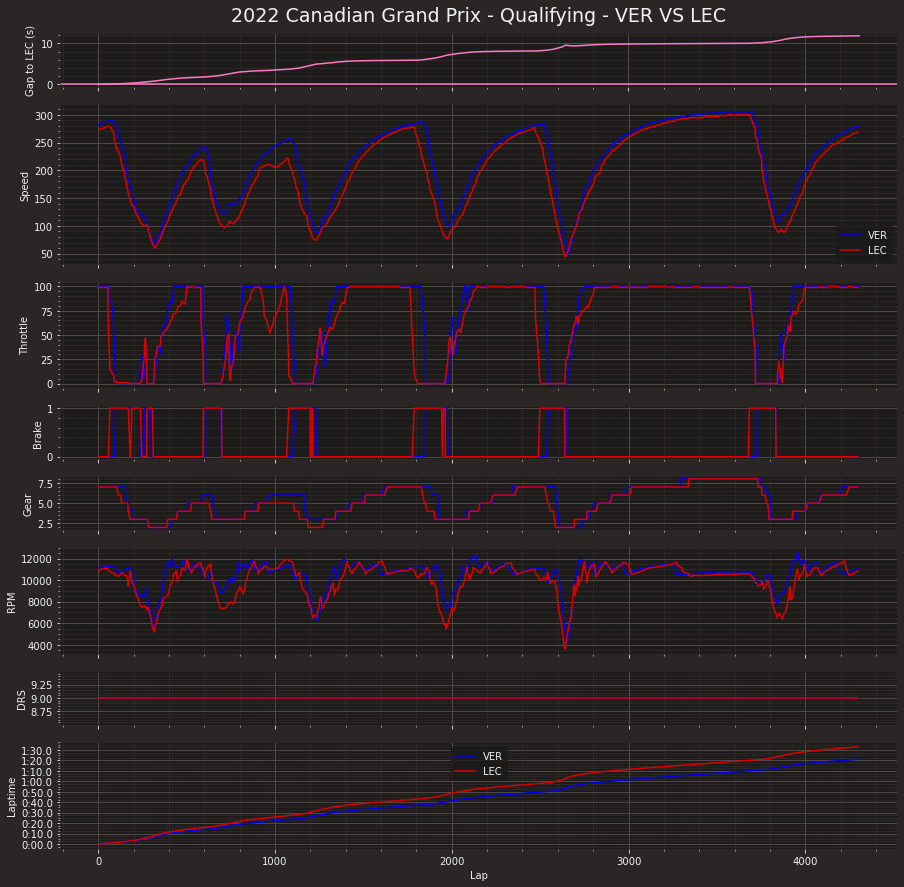

In [13]:
Driver_lap_comparison('VER','LEC')

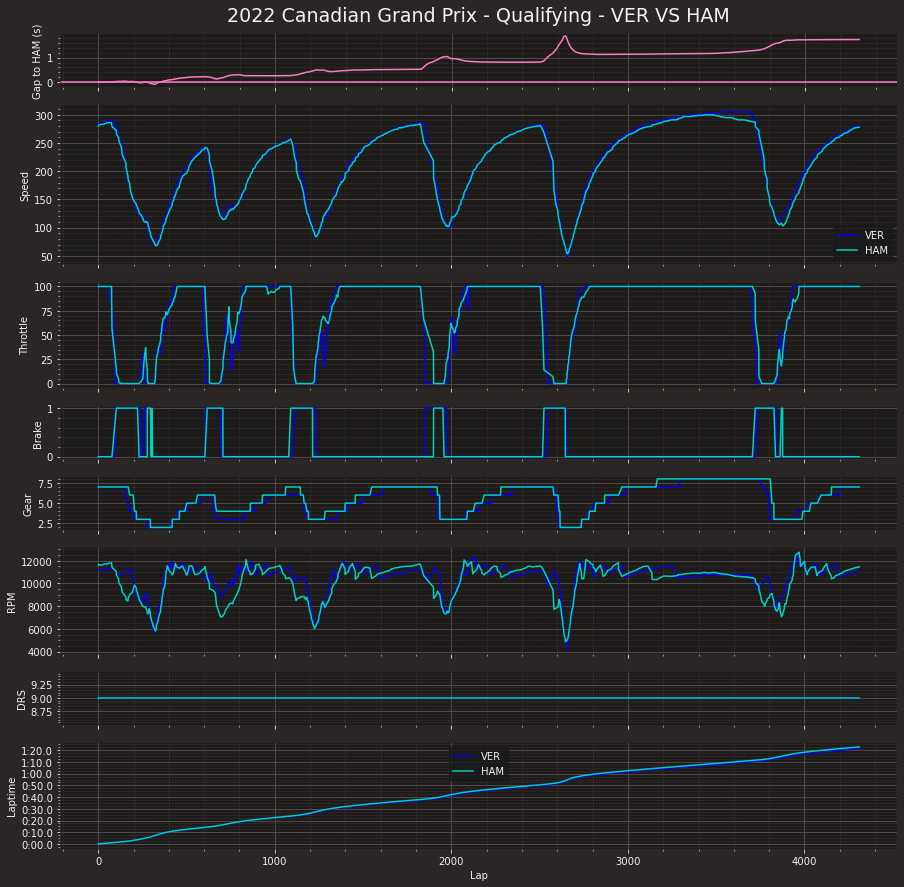

In [17]:
Driver_lap_comparison('VER','HAM')

In [14]:
def driver_gear_changes(driver1):
     # replace with your cache directory



    lap = quali.laps.pick_driver(driver1).pick_fastest()
    tel = lap.get_telemetry()


    x = np.array(tel['X'].values)
    y = np.array(tel['Y'].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    gear = tel['nGear'].to_numpy().astype(float)


    cmap = cm.get_cmap('Paired')
    lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
    lc_comp.set_array(gear)
    lc_comp.set_linewidth(4)

    plt.gca().add_collection(lc_comp)
    plt.axis('equal')
    plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

    title = plt.suptitle(
        f"Fastest Lap Gear Shift Visualization\n"
        f"{driver1} - {quali.event['EventName']} {quali.event.year}")

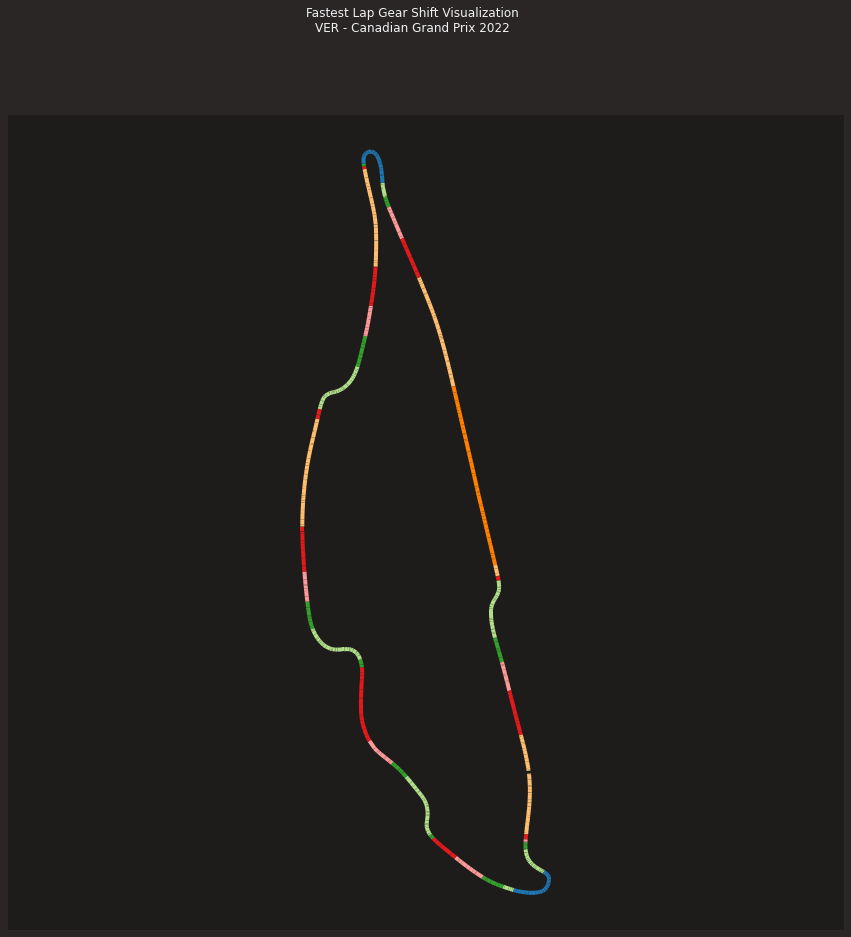

In [15]:
driver_gear_changes('VER')

In [22]:
def driver_speed_change(driver1):

    year = 2022
    ses = 'R'
    driver = 'VER'
    colormap = plt.cm.plasma

    lap = quali.laps.pick_driver(driver1).pick_fastest()

    # Get telemetry data
    x = lap.telemetry['X']              # values for x-axis
    y = lap.telemetry['Y']              # values for y-axis
    color = lap.telemetry['Speed']      # value to base color gradient on

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # We create a plot with title and adjust some setting to make it look good.
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
    fig.suptitle(f'{grand_prix} {year} - {driver1} - Speed', size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')


    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(color)

    # Merge all line segments together
    line = ax.add_collection(lc)


    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


    # Show the plot
    plt.show()

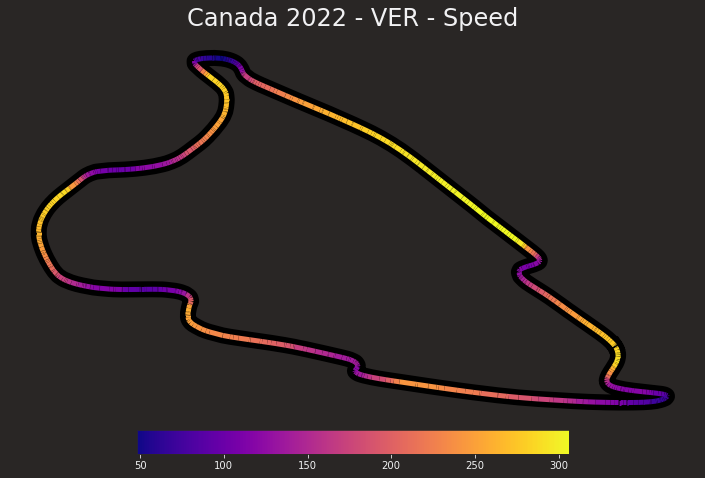

In [24]:
driver_speed_change('VER')